In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Network-Science-final-Maximization/

Mounted at /content/drive
/content/drive/MyDrive/Network-Science-final-Maximization


In [10]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
import random as rd
import copy
import time

In [ ]:
class Independent_Cascade():
    def __init__(self):
        self.g = nx.DiGraph()
        self.num_nodes = 0
        self.node_label = []
        self.label2id = {}
        self.probability = None

    def fit(self, g):
        self.g = g
        self.num_nodes = g.number_of_nodes()
        self.node_label = [i for i in g.nodes()]
        self.label2id = {self.node_label[i]: i for i in range(self.num_nodes)}
        in_degree = g.in_degree(weight='None')
        self.probability = np.zeros((self.num_nodes, self.num_nodes), dtype=float)
        for e in g.edges():
            if(in_degree[e[1]] >= 10):
                self.probability[self.label2id[e[0]], self.label2id[e[1]]] = 1 / int(np.log(in_degree[e[1]]))
            else:
                self.probability[self.label2id[e[0]], self.label2id[e[1]]] = 1
        
    def monte_carlo_diffusion_all(self, seed_nodes, num_simulations=100):
        if(seed_nodes == []):
            return [], []
        activate_nums_list = []
        for _ in range(num_simulations):
            _, activate_nums = self.diffusion_all(seed_nodes)
            activate_nums_list.append(activate_nums)
        narry = np.zeros([len(activate_nums_list),len(max(activate_nums_list,key = lambda x: len(x)))])
        for i,j in enumerate(activate_nums_list):
            narry[i][0:len(j)] = j
        return np.mean(narry, axis=0)

    def monte_carlo_diffusion_step(self, seed_nodes, max_step=1, num_simulations=100):
        if(seed_nodes == []):
            return [], []
        activate_nums_list = []
        for _ in range(num_simulations):
            _, activate_nums = self.diffusion_step(seed_nodes, max_step)
            activate_nums_list.append(activate_nums)
        narry = np.zeros([len(activate_nums_list),len(max(activate_nums_list,key = lambda x: len(x)))])
        for i,j in enumerate(activate_nums_list):
            narry[i][0:len(j)] = j
        return np.mean(narry, axis=0)
    
    # diffusion to all possible nodes
    def diffusion_all(self, seed_nodes):
        if(seed_nodes == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in seed_nodes]
        old_activated_nodes = copy.deepcopy(activated_nodes)
        activate_nums = [len(activated_nodes)]
        while(True):
            new_activated_nodes = []
            for node in old_activated_nodes:
                neighbors = self.probability[node, :].nonzero()[0]
                if(len(neighbors) == 0):
                    continue
                for neighbor in neighbors:
                    if(neighbor in activated_nodes and neighbor not in new_activated_nodes):
                        continue
                    if (self.probability[node][neighbor] >= rd.random()):
                        new_activated_nodes.append(neighbor)
            activated_nodes.extend(new_activated_nodes)
            if len(new_activated_nodes) == 0:
                break
            old_activated_nodes = copy.deepcopy(new_activated_nodes)
            activate_nums.append(len(new_activated_nodes))
        return activated_nodes, activate_nums

    # diffusion to max step
    def diffusion_step(self, seed_nodes, max_step=1):
        if(seed_nodes == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in seed_nodes]
        old_activated_nodes = copy.deepcopy(activated_nodes)
        activate_nums = [len(activated_nodes)]
        for step in range(max_step):
            new_activated_nodes = []
            for node in old_activated_nodes:
                neighbors = self.probability[node, :].nonzero()[0]
                if(len(neighbors) == 0):
                    continue
                for neighbor in neighbors:
                    if(neighbor in activated_nodes and neighbor not in new_activated_nodes):
                        continue
                    if (self.probability[node][neighbor] >= rd.random()):
                        new_activated_nodes.append(neighbor)
            activated_nodes.extend(new_activated_nodes)
            if len(new_activated_nodes) == 0:
                break
            old_activated_nodes = copy.deepcopy(new_activated_nodes)
            activate_nums.append(len(new_activated_nodes))
        return activated_nodes, activate_nums

In [ ]:
class Decreasing_Cascade():
    def __init__(self):
        self.g = nx.DiGraph()
        self.num_nodes = 0
        self.node_label = []
        self.label2id = {}
        self.max_in_degree = 0
        self.probability = None

    def fit(self, g):
        # fit graph with probability
        self.g = g
        self.num_nodes = g.number_of_nodes()
        self.node_label = [i for i in g.nodes()]
        self.label2id = {self.node_label[i]: i for i in range(self.num_nodes)}
        self.max_in_degree = max(j for _, j in g.in_degree(weight='None'))
        in_degree = g.in_degree(weight='None')
        self.probability = np.zeros((self.num_nodes, self.num_nodes), dtype=float)
        for e in g.edges():
            if(in_degree[e[1]] >= 10):
                self.probability[self.label2id[e[0]], self.label2id[e[1]]] = 1 / int(np.log(in_degree[e[1]]))
            else:
                self.probability[self.label2id[e[0]], self.label2id[e[1]]] = 1
            
    def monte_carlo_diffusion_all(self, seed_nodes, num_simulations=100):
        if(seed_nodes == []):
            return [], []
        activate_nums_list = []
        for _ in range(num_simulations):
            _, activate_nums = self.diffusion_all(seed_nodes)
            activate_nums_list.append(activate_nums)
        narry = np.zeros([len(activate_nums_list),len(max(activate_nums_list,key = lambda x: len(x)))])
        for i,j in enumerate(activate_nums_list):
            narry[i][0:len(j)] = j
        return np.mean(narry, axis=0)

    def monte_carlo_diffusion_step(self, seed_nodes, max_step=1, num_simulations=100):
        if(seed_nodes == []):
            return [], []
        activate_nums_list = []
        for _ in range(num_simulations):
            _, activate_nums = self.diffusion_step(seed_nodes, max_step)
            activate_nums_list.append(activate_nums)
        narry = np.zeros([len(activate_nums_list),len(max(activate_nums_list,key = lambda x: len(x)))])
        for i,j in enumerate(activate_nums_list):
            narry[i][0:len(j)] = j
        return np.mean(narry, axis=0)
        
    # diffusion to all possible nodes
    def diffusion_all(self, seed_nodes):
        if(seed_nodes == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in seed_nodes]
        old_activated_nodes = copy.deepcopy(activated_nodes)
        activate_nums = [len(activated_nodes)]
        inform_times = np.zeros(self.num_nodes)
        while(True):
            new_activated_nodes = []
            new_inform_times = np.zeros(self.num_nodes)
            for node in old_activated_nodes:
                neighbors = self.probability[node, :].nonzero()[0]
                if(len(neighbors) == 0):
                    continue
                for neighbor in neighbors:
                    if(neighbor in activated_nodes and neighbor not in new_activated_nodes):
                        continue
                    new_inform_times[neighbor] += 1
                    if (self.probability[node][neighbor] >= (rd.random()+ inform_times[neighbor] / self.max_in_degree) ):
                        new_activated_nodes.append(neighbor)
            activated_nodes.extend(new_activated_nodes)
            if len(new_activated_nodes) == 0:
                break
            old_activated_nodes = copy.deepcopy(new_activated_nodes)
            activate_nums.append(len(new_activated_nodes))
            inform_times = inform_times + new_inform_times
        return activated_nodes, activate_nums

    # diffusion to max step
    def diffusion_step(self, seed_nodes, max_step=1):
        if(seed_nodes == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in seed_nodes]
        old_activated_nodes = copy.deepcopy(activated_nodes)
        activate_nums = [len(activated_nodes)]
        inform_times = np.zeros(self.num_nodes)
        for step in range(max_step):
            new_activated_nodes = []
            new_inform_times = np.zeros(self.num_nodes)
            for node in old_activated_nodes:
                neighbors = self.probability[node, :].nonzero()[0]
                if(len(neighbors) == 0):
                    continue
                for neighbor in neighbors:
                    if(neighbor in activated_nodes and neighbor not in new_activated_nodes):
                        continue
                    new_inform_times[neighbor] += 1
                    if (self.probability[node][neighbor] >= (rd.random()+ inform_times[neighbor] / self.max_in_degree) ):
                        new_activated_nodes.append(neighbor)
            activated_nodes.extend(new_activated_nodes)
            if len(new_activated_nodes) == 0:
                break
            old_activated_nodes = copy.deepcopy(new_activated_nodes)
            activate_nums.append(len(new_activated_nodes))
            inform_times = inform_times + new_inform_times
        return activated_nodes, activate_nums

In [ ]:
class Weighted_Cascade():
    def __init__(self):
        self.g = nx.DiGraph()
        self.num_nodes = 0
        self.node_label = []
        self.label2id = {}
        self.probability = None

    def fit(self, g):
        self.g = g
        self.num_nodes = g.number_of_nodes()
        self.node_label = [i for i in g.nodes()]
        self.label2id = {self.node_label[i]: i for i in range(self.num_nodes)}
        in_degree = g.in_degree(weight='None')
        self.probability = np.zeros((self.num_nodes, self.num_nodes), dtype=float)
        for e in g.edges():
            self.probability[self.label2id[e[0]], self.label2id[e[1]]] = 1 / in_degree[e[1]]
        
    def monte_carlo_diffusion_all(self, seed_nodes, num_simulations=100):
        if(seed_nodes == []):
            return [], []
        activate_nums_list = []
        for _ in range(num_simulations):
            _, activate_nums = self.diffusion_all(seed_nodes)
            activate_nums_list.append(activate_nums)
        narry = np.zeros([len(activate_nums_list),len(max(activate_nums_list,key = lambda x: len(x)))])
        for i,j in enumerate(activate_nums_list):
            narry[i][0:len(j)] = j
        return np.mean(narry, axis=0)

    def monte_carlo_diffusion_step(self, seed_nodes, max_step=1, num_simulations=100):
        if(seed_nodes == []):
            return [], []
        activate_nums_list = []
        for _ in range(num_simulations):
            _, activate_nums = self.diffusion_step(seed_nodes, max_step)
            activate_nums_list.append(activate_nums)
        narry = np.zeros([len(activate_nums_list),len(max(activate_nums_list,key = lambda x: len(x)))])
        for i,j in enumerate(activate_nums_list):
            narry[i][0:len(j)] = j
        return np.mean(narry, axis=0)
    
    # diffusion to all possible nodes
    def diffusion_all(self, seed_nodes):
        if(seed_nodes == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in seed_nodes]
        old_activated_nodes = copy.deepcopy(activated_nodes)
        activate_nums = [len(activated_nodes)]
        while(True):
            new_activated_nodes = []
            for node in old_activated_nodes:
                neighbors = self.probability[node, :].nonzero()[0]
                if(len(neighbors) == 0):
                    continue
                for neighbor in neighbors:
                    if(neighbor in activated_nodes and neighbor not in new_activated_nodes):
                        continue
                    if (self.probability[node][neighbor] >= rd.random()):
                        new_activated_nodes.append(neighbor)
            activated_nodes.extend(new_activated_nodes)
            if len(new_activated_nodes) == 0:
                break
            old_activated_nodes = copy.deepcopy(new_activated_nodes)
            activate_nums.append(len(new_activated_nodes))
        return activated_nodes, activate_nums

    # diffusion to max step
    def diffusion_step(self, seed_nodes, max_step=1):
        if(seed_nodes == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in seed_nodes]
        old_activated_nodes = copy.deepcopy(activated_nodes)
        activate_nums = [len(activated_nodes)]
        for step in range(max_step):
            new_activated_nodes = []
            for node in old_activated_nodes:
                neighbors = self.probability[node, :].nonzero()[0]
                if(len(neighbors) == 0):
                    continue
                for neighbor in neighbors:
                    if(neighbor in activated_nodes and neighbor not in new_activated_nodes):
                        continue
                    if (self.probability[node][neighbor] >= rd.random()):
                        new_activated_nodes.append(neighbor)
            activated_nodes.extend(new_activated_nodes)
            if len(new_activated_nodes) == 0:
                break
            old_activated_nodes = copy.deepcopy(new_activated_nodes)
            activate_nums.append(len(new_activated_nodes))
        return activated_nodes, activate_nums

In [ ]:
class Trivalency_Model():
    def __init__(self):
        self.g = nx.DiGraph()
        self.num_nodes = 0
        self.node_label = []
        self.label2id = {}
        self.probability = None

    def fit(self, g):
        self.g = g
        self.num_nodes = g.number_of_nodes()
        self.node_label = [i for i in g.nodes()]
        self.label2id = {self.node_label[i]: i for i in range(self.num_nodes)}
        in_degree = g.in_degree(weight='None')
        self.probability = np.zeros((self.num_nodes, self.num_nodes), dtype=float)
        p_list = [0.1, 0.01, 0.001]
        for e in g.edges():
            self.probability[self.label2id[e[0]], self.label2id[e[1]]] = rd.choice(p_list)

        
    def monte_carlo_diffusion_all(self, seed_nodes, num_simulations=100):
        if(seed_nodes == []):
            return [], []
        activate_nums_list = []
        for _ in range(num_simulations):
            _, activate_nums = self.diffusion_all(seed_nodes)
            activate_nums_list.append(activate_nums)
        narry = np.zeros([len(activate_nums_list),len(max(activate_nums_list,key = lambda x: len(x)))])
        for i,j in enumerate(activate_nums_list):
            narry[i][0:len(j)] = j
        return np.mean(narry, axis=0)

    def monte_carlo_diffusion_step(self, seed_nodes, max_step=1, num_simulations=100):
        if(seed_nodes == []):
            return [], []
        activate_nums_list = []
        for _ in range(num_simulations):
            _, activate_nums = self.diffusion_step(seed_nodes, max_step)
            activate_nums_list.append(activate_nums)
        narry = np.zeros([len(activate_nums_list),len(max(activate_nums_list,key = lambda x: len(x)))])
        for i,j in enumerate(activate_nums_list):
            narry[i][0:len(j)] = j
        return np.mean(narry, axis=0)
    
    # diffusion to all possible nodes
    def diffusion_all(self, seed_nodes):
        if(seed_nodes == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in seed_nodes]
        old_activated_nodes = copy.deepcopy(activated_nodes)
        activate_nums = [len(activated_nodes)]
        while(True):
            new_activated_nodes = []
            for node in old_activated_nodes:
                neighbors = self.probability[node, :].nonzero()[0]
                if(len(neighbors) == 0):
                    continue
                for neighbor in neighbors:
                    if(neighbor in activated_nodes and neighbor not in new_activated_nodes):
                        continue
                    if (self.probability[node][neighbor] >= rd.random()):
                        new_activated_nodes.append(neighbor)
            activated_nodes.extend(new_activated_nodes)
            if len(new_activated_nodes) == 0:
                break
            old_activated_nodes = copy.deepcopy(new_activated_nodes)
            activate_nums.append(len(new_activated_nodes))
        return activated_nodes, activate_nums

    # diffusion to max step
    def diffusion_step(self, seed_nodes, max_step=1):
        if(seed_nodes == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in seed_nodes]
        old_activated_nodes = copy.deepcopy(activated_nodes)
        activate_nums = [len(activated_nodes)]
        for step in range(max_step):
            new_activated_nodes = []
            for node in old_activated_nodes:
                neighbors = self.probability[node, :].nonzero()[0]
                if(len(neighbors) == 0):
                    continue
                for neighbor in neighbors:
                    if(neighbor in activated_nodes and neighbor not in new_activated_nodes):
                        continue
                    if (self.probability[node][neighbor] >= rd.random()):
                        new_activated_nodes.append(neighbor)
            activated_nodes.extend(new_activated_nodes)
            if len(new_activated_nodes) == 0:
                break
            old_activated_nodes = copy.deepcopy(new_activated_nodes)
            activate_nums.append(len(new_activated_nodes))
        return activated_nodes, activate_nums

In [18]:
class linear_threshold():
    def __init__(self):
        self.g = nx.DiGraph()
        self.influence = None
    
    def fit(self, g):
        # fit graph with probability
        in_degree = g.in_degree()
        self.num_nodes = g.number_of_nodes()
        self.node_label = [i for i in g.nodes()]
        max_degree = max([d for (n, d) in in_degree])
        self.label2id = {self.node_label[i]: i for i in range(self.num_nodes)}
        self.influence = np.zeros((self.num_nodes, self.num_nodes), dtype=float)
        # init influence 
        for e in g.edges():
            self.influence[self.label2id[e[0]], self.label2id[e[1]]] = 1 / in_degree[e[1]]
        self.g = g
        return g
    
    # diffusion to all possible nodes
    def diffusion_all(self, init_seed, threshold=0.001):
        if(init_seed == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in init_seed]
        old_activated_nodes = copy.deepcopy(activated_nodes)
        # the index represent time t, the value is number of activated nodes in current time
        times = [len(old_activated_nodes)]
        while True:
            new_activated_nodes = []
            for node in old_activated_nodes:
                neighbors = self.influence[node, :].nonzero()[0]
                if(len(neighbors) == 0):
                    continue
                for neighbor in neighbors:
                    total_influence = 0.0
                    if(neighbor in activated_nodes or neighbor in new_activated_nodes):
                        continue
                    precessors = self.influence[:, neighbor].nonzero()[0]
                    for precessor in precessors:
                        if precessor in activated_nodes:
                            total_influence += self.influence[precessor][neighbor]
                    if(total_influence >= threshold):
                        new_activated_nodes.append(neighbor)
            if len(new_activated_nodes)==0:
                break
            else:
                activated_nodes.extend(new_activated_nodes)
            old_activated_nodes = copy.deepcopy(new_activated_nodes)
            times.append(len(new_activated_nodes))
        return activated_nodes, times
    
    # diffusion to max step
    def diffusion_step(self, init_seed, threshold=0.1, max_step=1):
        if(init_seed == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in init_seed]
        old_activated_nodes = copy.deepcopy(activated_nodes)
        # the index represent time t, the value is number of activated nodes in current time
        times = [len(old_activated_nodes)]
        for _ in range(max_step):
            new_activated_nodes = []
            for node in old_activated_nodes:
                neighbors = self.influence[node, :].nonzero()[0]
                if(len(neighbors) == 0):
                    continue
                for neighbor in neighbors:
                    total_influence = 0.0
                    if(neighbor in activated_nodes or neighbor in new_activated_nodes):
                        continue
                    precessors = self.influence[:, neighbor].nonzero()[0]
                    for precessor in precessors:
                        if precessor in activated_nodes:
                            total_influence += self.influence[precessor][neighbor]
                    if(total_influence >= threshold):
                        new_activated_nodes.append(neighbor)
            if len(new_activated_nodes)==0:
                break
            else:
                activated_nodes.extend(new_activated_nodes)
            old_activated_nodes = copy.deepcopy(new_activated_nodes)
            times.append(len(new_activated_nodes))
        return activated_nodes, times
    

In [17]:
class general_threshold():
    def __init__(self):
        self.g = nx.DiGraph()
        self.influence = None
        # threshold determine whether the node become activated
        self.threshold = None
        # spreadTrd determine whether the node have the ability to spread message
        self.spreadTrd = None
    
    def fit(self, g):
        # fit graph with probability
        in_degree = g.in_degree()
        self.num_nodes = g.number_of_nodes()
        self.node_label = [i for i in g.nodes()]
        self.label2id = {self.node_label[i]: i for i in range(self.num_nodes)}
        self.influence = np.zeros((self.num_nodes, self.num_nodes), dtype=float)
        centrality = nx.degree_centrality(g)
        # init influence
        for e in g.edges():
            self.influence[self.label2id[e[0]], self.label2id[e[1]]] = 1 / in_degree[e[1]]
        # init threshold. In GT model, the threshold of each node is assigned half of it's centrality
        self.threshold = np.zeros((self.num_nodes), dtype=float)
        self.spreadTrd = np.zeros((self.num_nodes), dtype=float)
        for n in g.nodes():
            self.threshold[self.label2id[n]] = centrality[n]/4
            self.spreadTrd[self.label2id[n]] = centrality[n]/2
        self.g = g
        return g
    
    # diffusion to all possible nodes
    def diffusion_all(self, init_seed):
        if(init_seed == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in init_seed]
        old_spread_nodes = copy.deepcopy(activated_nodes)
        # the index represent time t, the value is number of activated nodes in current time
        times = [len(old_spread_nodes)]
        while True:
            new_activated_nodes = []
            new_spread_nodes = []
            for node in old_spread_nodes:
                neighbors = self.influence[node, :].nonzero()[0]
                if(len(neighbors) == 0):
                    continue
                for neighbor in neighbors:
                    total_influence = 0.0
                    if(neighbor in activated_nodes or neighbor in new_activated_nodes):
                        continue
                    precessors = self.influence[:, neighbor].nonzero()[0]
                    for precessor in precessors :
                        if precessor in activated_nodes or precessor in new_activated_nodes:
                            total_influence += self.influence[precessor][neighbor]
                    # informe/activate the node if the total influence exceeds it's threshold of activated
                    if(total_influence >= self.threshold[neighbor]):
                        new_activated_nodes.append(neighbor)
                        # let node be a spreader if the total influence exceeds it's threshold of spread
                        if(total_influence >= self.spreadTrd[neighbor]):
                            new_spread_nodes.append(neighbor)
            if len(new_spread_nodes)==0:
                break
            else:
                activated_nodes.extend(new_activated_nodes)
            old_spread_nodes = copy.deepcopy(new_spread_nodes)
            times.append(len(new_activated_nodes))
        return activated_nodes, times
    
    # diffusion to max step
    def diffusion_step(self, init_seed, max_step=1):
        if(init_seed == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in init_seed]
        old_spread_nodes = copy.deepcopy(activated_nodes)
        # the index represent time t, the value is number of activated nodes in current time
        times = [len(old_spread_nodes)]
        for _ in range(max_step):
            new_activated_nodes = []
            new_spread_nodes = []
            for node in old_spread_nodes:
                neighbors = self.influence[node, :].nonzero()[0]
                if(len(neighbors) == 0):
                    continue
                for neighbor in neighbors:
                    total_influence = 0.0
                    if(neighbor in activated_nodes or neighbor in new_activated_nodes):
                        continue
                    precessors = self.influence[:, neighbor].nonzero()[0]
                    for precessor in precessors:
                        if precessor in activated_nodes or precessor in new_activated_nodes:
                            total_influence += self.influence[precessor][neighbor]
                    # informe/activate the node if the total influence exceeds it's threshold of activated
                    if(total_influence >= self.threshold[neighbor]):
                        new_activated_nodes.append(neighbor)
                        # let node be a spreader if the total influence exceeds it's threshold of spread
                        if(total_influence >= self.spreadTrd[neighbor]):
                            new_spread_nodes.append(neighbor)
            if len(new_spread_nodes)==0:
                break
            else:
                activated_nodes.extend(new_activated_nodes)
            old_spread_nodes = copy.deepcopy(new_spread_nodes)
            times.append(len(new_activated_nodes))
        return activated_nodes, times
    
    

In [13]:
def Naive_Greedy(g, k, model_type, num_simulations=1):
    if(model_type == 'IC'):
        model = Independent_Cascade()
    elif(model_type == 'DC'):
        model = Decreasing_Cascade()
    elif(model_type == 'TR'):
        model = Trivalency_Model()
    elif(model_type == 'WC'):
        model = Weighted_Cascade()
    elif(model_type == 'LT'):
        model = linear_threshold()
    elif(model_type == 'GT'):
        model = general_threshold()
    model.fit(g)
    max_nodes = []
    times = []
    start_time = time.time()
    for i in range(k):
        max_num = 0
        for node in g.nodes() - set(max_nodes):
            if(model_type == 'IC' or model_type == 'DC' or model_type == 'TR' or model_type == 'WC'):
              activate_nums = model.monte_carlo_diffusion_step(max_nodes + [node], max_step=1, num_simulations=num_simulations)
            elif(model_type == 'LT'):
              _, activate_nums = model.diffusion_step(max_nodes + [node], threshold = 0.1, max_step=1)
            else:
              _, activate_nums = model.diffusion_step(max_nodes + [node], max_step=1)
            if(len(activate_nums) > 1 and activate_nums[1] > max_num):
                max_num = activate_nums[1]
                max_node = node
        max_nodes.append(max_node)
        times.append(time.time() - start_time)
        print('Greedy: ', i+1, ' time: ', times[-1], ' new node: ', max_nodes[-1])
    return max_nodes, times

In [14]:
G = nx.read_gml('PB2020.gml')
G = G.reverse()

In [ ]:
max_nodes_IC, times_IC = Naive_Greedy(G, 20, 'IC', num_simulations=10)
print(max_nodes_IC)

Greedy:  1  time:  10.741265773773193
Greedy:  2  time:  236.766015291214
Greedy:  3  time:  627.04882645607
Greedy:  4  time:  1146.5669751167297
Greedy:  5  time:  1785.7016961574554
Greedy:  6  time:  2523.2258718013763
Greedy:  7  time:  3351.641788005829
Greedy:  8  time:  4245.376266717911
Greedy:  9  time:  5212.538978815079
Greedy:  10  time:  6237.875088214874
Greedy:  11  time:  7317.844819784164
Greedy:  12  time:  8447.575536966324
Greedy:  13  time:  9625.548919200897
Greedy:  14  time:  10851.33715724945
Greedy:  15  time:  12123.000044822693
Greedy:  16  time:  13442.503648996353
Greedy:  17  time:  14809.777120113373
Greedy:  18  time:  16218.910614013672
Greedy:  19  time:  17672.560995817184
Greedy:  20  time:  19170.619923830032
['principe_giovan', 'Premises187', 'MoralDK', 'proudboy_', 'enrique_tarrio', 'GavinM_ProudBoy', 'proudboy2012', 'ProudBoysGBG', 'ProudBoysUS', 'ProudBoyzLondon', 'DetroitProudBoy', 'Father_Rhyme', 'ColoradoPOYB', 'Proudboy13', 'AWallfred', 'p

In [ ]:
max_nodes_IC = ['principe_giovan', 'Premises187', 'MoralDK', 'proudboy_', 'enrique_tarrio', 'GavinM_ProudBoy', 'proudboy2012', 'ProudBoysGBG', 'ProudBoysUS', 'ProudBoyzLondon', 'DetroitProudBoy', 'Father_Rhyme', 'ColoradoPOYB', 'Proudboy13', 'AWallfred', 'pullarkkat', 's817m', 'Somerled10', 'CodyBarnes13', 'GunsGodandTexas']
times_IC = [10.741265773773193, 236.766015291214, 627.04882645607, 1146.5669751167297, 1785.7016961574554, 2523.2258718013763, 3351.641788005829, 4245.376266717911, 5212.538978815079, 6237.875088214874,
       7317.844819784164, 8447.575536966324, 9625.548919200897, 10851.33715724945, 12123.000044822693, 13442.503648996353, 14809.777120113373, 16218.910614013672, 17672.560995817184, 19170.619923830032]

In [ ]:
plt.fig(figsize=(12, 8))
x = np.arange(1, 21)
plt.plot(x, times_IC)

In [ ]:
max_nodes_DC, times_DC = Naive_Greedy(G, 20, 'DC', num_simulations=10)
print(max_nodes_DC)
print(times_DC)

Greedy:  1  time:  14.71357774734497  new node:  principe_giovan
Greedy:  2  time:  341.92752385139465  new node:  Premises187
Greedy:  3  time:  883.5976860523224  new node:  MoralDK
Greedy:  4  time:  1604.629472732544  new node:  proudboy_
Greedy:  5  time:  2461.862696647644  new node:  enrique_tarrio
Greedy:  6  time:  3426.686062335968  new node:  GavinM_ProudBoy
Greedy:  7  time:  4488.1514637470245  new node:  proudboy2012
Greedy:  8  time:  5628.830832004547  new node:  ProudBoysGBG
Greedy:  9  time:  6839.51228928566  new node:  ProudBoysUS
Greedy:  10  time:  8111.640333890915  new node:  ProudBoyzLondon
Greedy:  11  time:  9430.324719429016  new node:  DetroitProudBoy
Greedy:  12  time:  10844.845517396927  new node:  Father_Rhyme
Greedy:  13  time:  12300.381844520569  new node:  ColoradoPOYB
Greedy:  14  time:  13789.093884468079  new node:  Proudboy13
Greedy:  15  time:  15337.097647666931  new node:  RoryWeb1
Greedy:  16  time:  16933.31753540039  new node:  fidelbogen


In [ ]:
max_nodes_DC = ['principe_giovan', 'Premises187', 'MoralDK', 'proudboy_', 'enrique_tarrio', 'GavinM_ProudBoy', 'proudboy2012', 'ProudBoysGBG', 'ProudBoysUS', 'ProudBoyzLondon', 'DetroitProudBoy', 'Father_Rhyme', 'ColoradoPOYB', 'Proudboy13', 'RoryWeb1', 'fidelbogen', 'HomeCoffeeGeek', 'DeathsquadMn', 'ZvoneCizl', 'JuanYsidroGalva']
times_DC = [14.71357774734497, 341.92752385139465, 883.5976860523224, 1604.629472732544, 2461.862696647644, 3426.686062335968, 4488.1514637470245, 5628.830832004547, 6839.51228928566, 8111.640333890915, 9430.324719429016, 10844.845517396927, 12300.381844520569, 13789.093884468079, 15337.097647666931, 16933.31753540039, 18599.448838949203, 20311.356774568558, 22050.487572193146, 23826.209863185883]

In [ ]:
max_nodes_WC, times_WC = Naive_Greedy(G, 20, 'WC', num_simulations=10)
print(max_nodes_WC)

Greedy:  1  time:  10.501221656799316
Greedy:  2  time:  235.98831987380981
Greedy:  3  time:  625.4327020645142
Greedy:  4  time:  1132.241504907608
Greedy:  5  time:  1809.7334263324738
Greedy:  6  time:  2598.581643819809
Greedy:  7  time:  3467.8672041893005
Greedy:  8  time:  4406.797207117081
Greedy:  9  time:  5355.24767780304
Greedy:  10  time:  6342.11412024498
Greedy:  11  time:  7458.015537261963
Greedy:  12  time:  8603.017973661423
Greedy:  13  time:  9797.863656759262
Greedy:  14  time:  11074.132063627243
Greedy:  15  time:  12310.55555319786
Greedy:  16  time:  13591.142619132996
Greedy:  17  time:  14951.905377626419
Greedy:  18  time:  16330.707174301147
Greedy:  19  time:  17719.568944215775
Greedy:  20  time:  19143.71673488617
['principe_giovan', 'Premises187', 'MoralDK', 'proudboy_', 'enrique_tarrio', 'GavinM_ProudBoy', 'proudboy2012', 'ProudBoysGBG', 'ProudBoysUS', 'ProudBoyzLondon', 'DetroitProudBoy', 'ColoradoPOYB', 'maver_michael', 'Father_Rhyme', 'PrismicTita

In [ ]:
max_nodes_WC = ['principe_giovan', 'Premises187', 'MoralDK', 'proudboy_', 'enrique_tarrio', 'GavinM_ProudBoy', 'proudboy2012', 'ProudBoysGBG', 'ProudBoysUS', 'ProudBoyzLondon', 'DetroitProudBoy', 'ColoradoPOYB', 'maver_michael', 'Father_Rhyme', 'PrismicTitan', 'LOLA_WTO_Brexit', 'BlackGoatWhite', 'drjosuemd', 'JoelleClosset', 'BEARDTRIBE']
times_WC = [10.501221656799316, 235.98831987380981, 625.4327020645142, 1132.241504907608, 1809.7334263324738, 2598.581643819809, 3467.8672041893005, 4406.797207117081, 5355.24767780304, 6342.11412024498, 
          7458.015537261963, 8603.017973661423, 9797.863656759262, 11074.132063627243, 12310.55555319786, 13591.142619132996, 14951.905377626419, 16330.707174301147, 17719.568944215775, 19143.71673488617]

In [ ]:
max_nodes_TR, times_TR = Naive_Greedy(G, 20, 'TR', num_simulations=10)
print(max_nodes_TR)
print(times_TR)

Greedy:  1  time:  18.129921674728394
Greedy:  2  time:  116.46895289421082
Greedy:  3  time:  287.21111941337585
Greedy:  4  time:  524.85125207901
Greedy:  5  time:  832.4093346595764
Greedy:  6  time:  1179.2758343219757
Greedy:  7  time:  1560.4931123256683
Greedy:  8  time:  1978.5172753334045
Greedy:  9  time:  2432.163257598877
Greedy:  10  time:  2921.079366207123
Greedy:  11  time:  3449.5212614536285
Greedy:  12  time:  4011.258317708969
Greedy:  13  time:  4609.557200670242
Greedy:  14  time:  5245.202206134796
Greedy:  15  time:  5914.974735498428
Greedy:  16  time:  6624.52285861969
Greedy:  17  time:  7362.484108924866
Greedy:  18  time:  8138.456142425537
Greedy:  19  time:  8949.351233005524
Greedy:  20  time:  9795.637311220169
['principe_giovan', 'Premises187', 'MoralDK', 'proudboy_', 'PrestorJohnAR', 'M4CTweets', 'RallyPb', 'TheHarlster', 'RealBeardedMen', 'TumultuousDon', 'DeathsquadFarm', 'scouse_sammii', 'real_billdoor', 'Foxwaldo', 'OttoOttofrank', 'MeganTh278261

In [ ]:
max_nodes_TR = ['principe_giovan', 'Premises187', 'MoralDK', 'proudboy_', 'PrestorJohnAR', 'M4CTweets', 'RallyPb', 'TheHarlster', 'RealBeardedMen', 'TumultuousDon', 'DeathsquadFarm', 'scouse_sammii', 'real_billdoor', 'Foxwaldo', 'OttoOttofrank', 'MeganTh27826133', 'DeathsquadSF', 'Brandnewkath', 'dzio2004', 'scottpainter123']
times_TR = [18.129921674728394, 116.46895289421082, 287.21111941337585, 524.85125207901, 832.4093346595764, 1179.2758343219757, 1560.4931123256683, 1978.5172753334045, 2432.163257598877, 2921.079366207123, 3449.5212614536285, 4011.258317708969, 4609.557200670242, 5245.202206134796, 5914.974735498428, 6624.52285861969, 7362.484108924866, 8138.456142425537, 8949.351233005524, 9795.637311220169]

In [15]:
max_nodes_LT, times_LT = Naive_Greedy(G, 4, 'LT')
print(max_nodes_LT)
print(times_LT)

Greedy:  1  time:  4.100809812545776  new node:  principe_giovan
Greedy:  2  time:  1008.6223180294037  new node:  Premises187
Greedy:  3  time:  2860.3388679027557  new node:  MoralDK
Greedy:  4  time:  5161.446223974228  new node:  proudboy_
['principe_giovan', 'Premises187', 'MoralDK', 'proudboy_']
[4.100809812545776, 1008.6223180294037, 2860.3388679027557, 5161.446223974228]


In [16]:
times_LT = [18.496607780456543, 4673.683553218842, 12130.40393280983, 21546.81477189064]
max_nodes_LT = ['principe_giovan', 'Premises187', 'MoralDK', 'proudboy_']

In [ ]:
max_nodes_GT, times_GT = Naive_Greedy(G, 20, 'GT')
print(max_nodes_GT)
print(times_GT)

Greedy:  1  time:  24.321068286895752  new node:  principe_giovan
Greedy:  2  time:  4938.9485912323  new node:  Premises187
Greedy:  3  time:  12814.373059272766  new node:  MoralDK
Greedy:  4  time:  22763.65157723427  new node:  proudboy_


In [ ]:
max_nodes_GT = ['principe_giovan', 'Premises187', 'MoralDK', 'proudboy_']
times_GT = [24.321068286895752, 4938.9485912323, 12814.373059272766, 22763.65157723427]

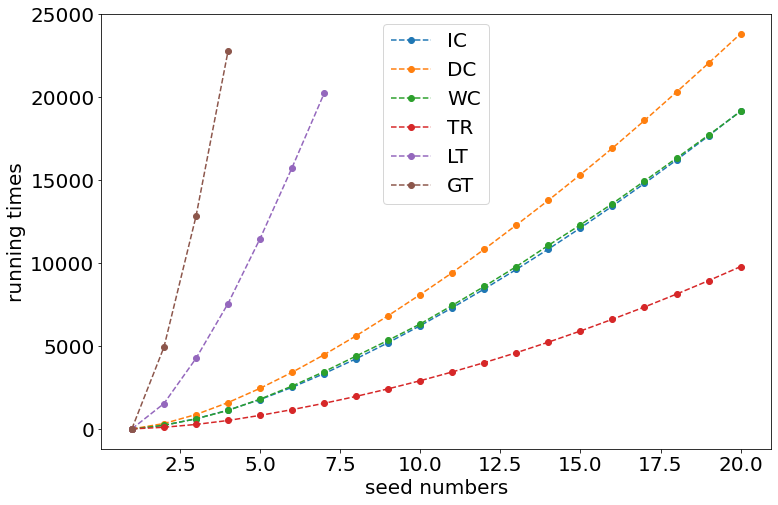

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(1, len(times_IC)+1), times_IC, 'o--', label = 'IC')
plt.plot(np.arange(1, len(times_DC)+1), times_DC, 'o--', label = 'DC')
plt.plot(np.arange(1, len(times_WC)+1), times_WC, 'o--', label = 'WC')
plt.plot(np.arange(1, len(times_TR)+1), times_TR, 'o--', label = 'TR')
plt.plot(np.arange(1, len(times_LT)+1), times_LT, 'o--', label = 'LT')
plt.plot(np.arange(1, len(times_GT)+1), times_GT, 'o--', label = 'GT')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('seed numbers', fontsize=20)
plt.ylabel('running times', fontsize=20)
plt.legend(fontsize=20)